In [2]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# データの読み込み
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/gay_data.csv"
df = pd.read_csv(url)
df.head()

,state,support,gay
0,Hawaii,58.6,5.1
1,Vermont,57.8,4.9
2,Oregon,54.0,4.9
3,Maine,51.1,4.8
4,Rhode Island,63.1,4.5


In [4]:
# 2.4節の推定結果

endog = df['gay'] # 被説明変数
exog = df['support'] # 説明変数
exog = sm.add_constant(exog) # 定数項

# モデルの推定
olsmod = sm.OLS(
    endog,
    exog
)
olsres = olsmod.fit()
# 結果の表示
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    gay   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     17.76
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           0.000110
Time:                        11:48:37   Log-Likelihood:                -45.147
No. Observations:                  50   AIC:                             94.29
Df Residuals:                      48   BIC:                             98.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3383      0.509      2.627      0.0

In [5]:
# 予測
support_value = 100 # supportが100のとき
Xnew = np.column_stack(
    (
        np.ones(1), # 定数項を追加
        [support_value]
    )
)
ynewpred = olsres.predict(Xnew) # 回帰直線olsresを用いて予測値を計算
print(f'support = {support_value} のときの予測値: {ynewpred[0]:.3f}')

support = 100 のときの予測値: 5.794


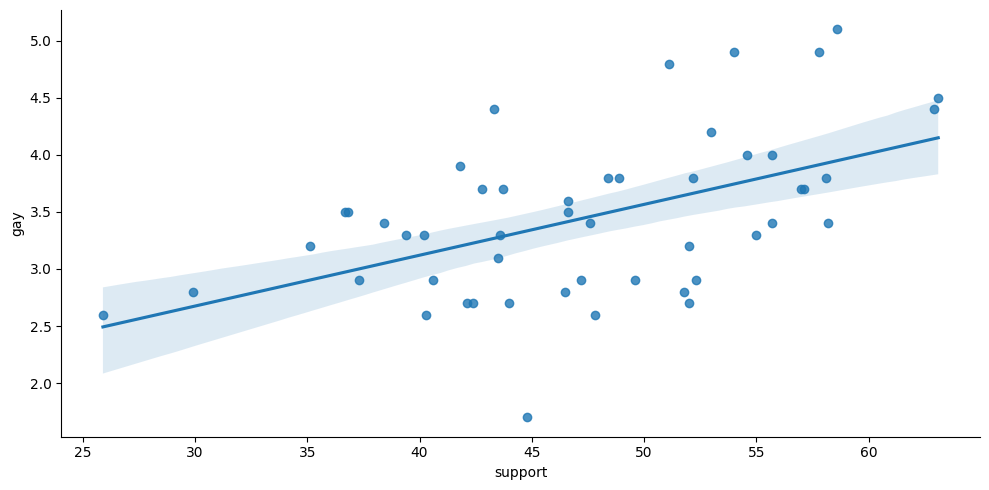

In [6]:
# 散布図と回帰直線
sns.lmplot(
     data = df,
     x = 'support',
     y = 'gay',
     aspect=2
)
plt.show()

In [7]:
# 相関係数
corr = np.corrcoef(
    df['gay'],
    df['support']
)
print(corr)

[[1.         0.51963809]
 [0.51963809 1.        ]]
